## What Are Is The Budget To Gross Ratio For The Top 3 Gernes?

Lets start by importing are need librarys.

In [1]:
# import librarys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## The Movies DB Data

Read tmbd.movies.csv into a dataframe.

In [2]:
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

#clean punctuation from row values
tmdb_movies['genre_ids'] = tmdb_movies['genre_ids'].str.replace('[^\w\s]','')

#change value in list of values
tmdb_movies['genre_ids'] = tmdb_movies['genre_ids'].str.split(' ')

tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


We want the Genre IDs put they are coded so we need to know what these codes stand for. Looking at forums from [themoviedb.org](https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee) we can find the genre id names and use this info to make a list of tuples for the genre ids called `tmdb_genre_ids`.

In [3]:
#data from 'https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee'
tmdb_genre_ids = [('Action', '28'), ('Adventure', '12'), ('Animation', '16'), ('Comedy', '35'),
('Crime', '80'), ('Documentary', '99'), ('Drama', '18'), ('Family', '10751'),
('Fantasy', '14'), ('History', '36'), ('Horror', '27'), ('Music', '10402'),
('Mystery', '9648'), ('Romance', '10749'), ('Science Fiction', '878'),
('TV Movie', '10770'), ('Thriller', '53'), ('War', '10752'), ('Western', '37')]

Next we make a function called `id_rename` that passes the parameter `id_value`. This function is going to return the the names of a movie's genre.

In [4]:
def id_rename(id_value):
    new_id_name = []
    for id_num in id_value:
        for id_pair in tmdb_genre_ids:
            if id_num == id_pair[1]:
                new_id_name.append(id_pair[0])
    return new_id_name

In [5]:
id_rename(tmdb_movies['genre_ids'][0])

['Adventure', 'Fantasy', 'Family']

Now are make a variable called `new_id_list` that is an empty list. Using a `for` loop we loop through each value in `tmdb_movies['genre_ids']` with are function and append what retruned to our empty list. After are new list is made we will make a new column called `'genre2'` and have it `=` are list.

In [6]:
new_id_list = []

for ids in tmdb_movies['genre_ids']:
    new_id_list.append(id_rename(ids))
    
tmdb_movies['genre2'] = new_id_list

In [7]:
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre2
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"[Adventure, Fantasy, Family]"
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[Fantasy, Adventure, Animation, Family]"
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[Adventure, Action, Science Fiction]"
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[Animation, Comedy, Family]"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[Action, Science Fiction, Adventure]"


Now that we have the genre names as a list for strings for each movie, we are goint to turn them into just a one string.

In [8]:
tmdb_movies['genre2'] = tmdb_movies.genre2.apply(', '.join)

In [9]:
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre2
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"Adventure, Fantasy, Family"
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"Fantasy, Adventure, Animation, Family"
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"Adventure, Action, Science Fiction"
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"Animation, Comedy, Family"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"Action, Science Fiction, Adventure"
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,"Horror, Drama"
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,"Drama, Thriller"
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,"Fantasy, Action, Adventure"
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,"Family, Adventure, Action"


## The Numbers Data

As before we are reading in are file in to a dataframe.

In [10]:
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


Looks like some of the value our columns need some fixing plus we have a few $0 values that we will need to drop.

First we change the str values for `production_budget`, `domestic_gross`, and `worldwide_gross` into floats by replacing the punctuation with `''` and then we droping any of the value that are `==` to `0`.

In [11]:
#changing the str in to int
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('[\$,]', '').astype('float')
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('[\$,]', '').astype('float')
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('[\$,]', '').astype('float')

#droping the 0 values
drop_domestic_gross = tn_movie_budgets.index[tn_movie_budgets['domestic_gross'] == 0].tolist()
drop_worldwide_gross = tn_movie_budgets.index[tn_movie_budgets['worldwide_gross'] == 0].tolist()
drop_both = drop_domestic_gross + drop_worldwide_gross
tn_movie_budgets = tn_movie_budgets.drop(tn_movie_budgets.index[drop_both])

tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000.0,70071.0,7.164400e+04
5776,77,"Dec 31, 2004",The Mongol King,7000.0,900.0,9.000000e+02
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03


## Merged: The Movies DB Data with The Numbers Data

Now that we have a two dataframes cleaned up and we have for values that we can work with. We are going to merge the two dataframes together so the the movies will have both genres, budgets, and gross values in one dataframe.

In [12]:
tmdb_tn_df = pd.merge(tn_movie_budgets, tmdb_movies, left_on = 'movie', right_on = 'original_title')

In [13]:
tmdb_tn_df.head(1)

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,genre2
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,"Action, Adventure, Fantasy, Science Fiction"


# Top 10 Genre Combos

So it seems like each movie has a genre combo like value, so lets get the mean of the top 10 worldwide gross and group them by the different genre combos.

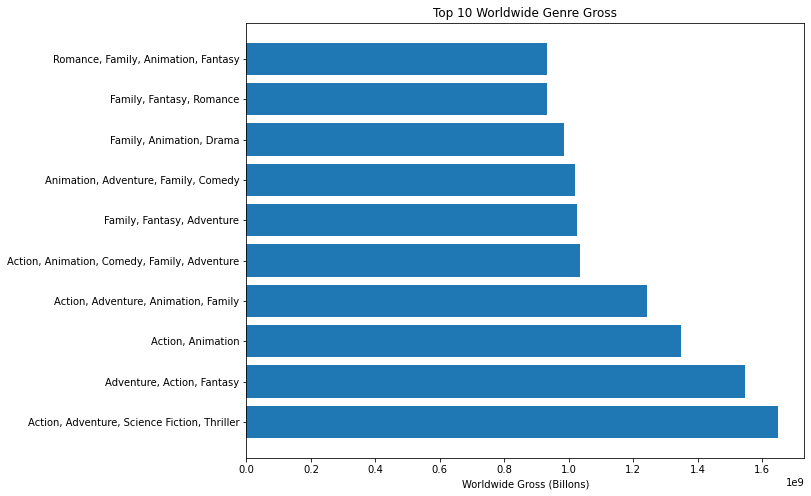

In [14]:
fig, ax = plt.subplots(1,1, figsize=(10, 8))
x = list(tmdb_tn_df.groupby(['genre2']).mean()['worldwide_gross'].sort_values(ascending=False).head(10).keys())
y = list(tmdb_tn_df.groupby(['genre2']).mean()['worldwide_gross'].sort_values(ascending=False).head(10).values)

ax.barh(x,y);
ax.set_title('Top 10 Worldwide Genre Gross')
ax.set_xlabel('Worldwide Gross (Billons)');

As you can we in the figure above there are a lot of gernes that are repeated in the combos, so let break them down and get just the top 10 single gernes.

# Top 10 Gerne Single

We are just making a new dataframe to work on here.

In [15]:
tmdb_tn_df_single = tmdb_tn_df

tmdb_tn_df_single.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,genre2
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,"Action, Adventure, Fantasy, Science Fiction"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,"Adventure, Action, Fantasy"
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457,"Action, Adventure, Science Fiction"
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,"Adventure, Action, Fantasy"
4,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510,"Action, Adventure, Fantasy, Science Fiction"


Now we are going to `split` the `genre2` column and `explode` them into different rows so that we can get the mean for each single gerne.

In [16]:
tmdb_tn_df_single['genre_single'] = tmdb_tn_df_single['genre2'].str.split(',')
tmdb_tn_df_single = tmdb_tn_df_single.explode('genre_single')
tmdb_tn_df_single['genre_single'] = tmdb_tn_df_single['genre_single'].str.strip()

In [17]:
tmdb_tn_df_single.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,genre2,genre_single
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,"Action, Adventure, Fantasy, Science Fiction",Action
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,"Action, Adventure, Fantasy, Science Fiction",Adventure
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,"Action, Adventure, Fantasy, Science Fiction",Fantasy
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,"Action, Adventure, Fantasy, Science Fiction",Science Fiction
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,"Adventure, Action, Fantasy",Adventure


Alright now that we have the genres split up into diffent rows we can now get the mean of each gerne and plot them into a bar chart.

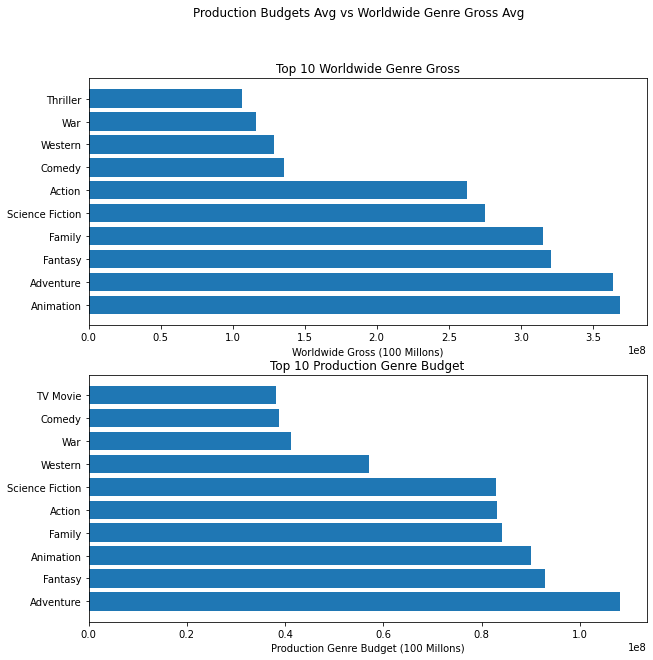

In [18]:
fig, [ax1,ax2] = plt.subplots(2,1, figsize=(10, 10))
x1 = list(tmdb_tn_df_single.groupby(['genre_single']).mean()['worldwide_gross'].sort_values(ascending=False).head(10).keys())
y1 = list(tmdb_tn_df_single.groupby(['genre_single']).mean()['worldwide_gross'].sort_values(ascending=False).head(10).values)

x2 = list(tmdb_tn_df_single.groupby(['genre_single']).mean()['production_budget'].sort_values(ascending=False).head(10).keys())
y2 = list(tmdb_tn_df_single.groupby(['genre_single']).mean()['production_budget'].sort_values(ascending=False).head(10).values)

fig.suptitle('Production Budgets Avg vs Worldwide Genre Gross Avg', fontsize=12)

ax1.barh(x1,y1);
ax1.set_title('Top 10 Worldwide Genre Gross')
ax1.set_xlabel('Worldwide Gross (100 Millons)')

ax2.barh(x2,y2);
ax2.set_title('Top 10 Production Genre Budget')
ax2.set_xlabel('Production Genre Budget (100 Millons)');

So it looks like are top three genres are animation, adventure, and fantasy. Awesome one last thing to do and then we will have the top 3 gerne budget to gross ratios.

## Find The Ratio For The Top Three

First we are taking the series for the top three genres and putting them into a dataframe, then merging them together.

In [19]:
top_three_gross_df = pd.DataFrame(tmdb_tn_df_single.groupby(['genre_single']).mean()['worldwide_gross'].sort_values(ascending=False).head(3))
top_thre_bud_df = pd.DataFrame(tmdb_tn_df_single.groupby(['genre_single']).mean()['production_budget'].sort_values(ascending=False).head(3))

top_three_df = pd.merge(top_three_gross_df, top_thre_bud_df, on = 'genre_single')

In [20]:
top_three_df

,worldwide_gross,production_budget
genre_single,,
Animation,3.688389e+08,8.996917e+07
Adventure,3.641347e+08,1.081437e+08
Fantasy,3.210093e+08,9.297764e+07


Now we are using a `for` loop to loop through are dataframe and print out the ratio for are top three gernes.

In [21]:
for row in range(0,3):
    pb = top_three_df['production_budget'][row]/top_three_df['production_budget'][row]
    wwg = top_three_df['worldwide_gross'][row]/top_three_df['production_budget'][row]
    print(f'The budget to gross ratio for {top_three_df.index[row]} is {int(pb)}:{int(wwg)}')

The budget to gross ratio for Animation is 1:4
The budget to gross ratio for Adventure is 1:3
The budget to gross ratio for Fantasy is 1:3
